Analysis of Product sales

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('product_sales.csv')
print(data.count())

week                 15000
sales_method         15000
customer_id          15000
nb_sold              15000
revenue              13926
years_as_customer    15000
nb_site_visits       15000
state                15000
dtype: int64


In [4]:
data['state'].value_counts()

state
California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode

In [5]:
print(data.groupby('sales_method')['revenue'].sum())

sales_method
Call            227563.49
Email           671630.75
Email + Call    404787.15
em + call         3469.54
email              687.08
Name: revenue, dtype: float64


In [6]:
list_labels = ["Call","Email","Email + Call"]

a = 'Call'
b = 'Email|email'
c = 'Email + Call|em + call'

conditions = (
    (data['sales_method'].str.contains(a)),
    (data['sales_method'].str.contains(b)),
    (data['sales_method'].str.contains(c))
)

data['sales_type'] = np.select(conditions, list_labels)
print(data['sales_type'].value_counts())
print(data['sales_method'].value_counts())

sales_type
Call     7511
Email    7466
0          23
Name: count, dtype: int64
sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64


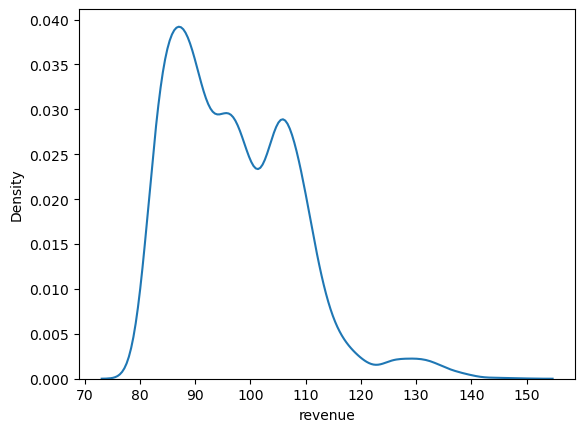

In [7]:
data_email = data[(data['sales_method'] == 'Email') | (data['sales_method'] == 'email')]
data_email.agg({'revenue':['median','mean']})
sns.kdeplot(x = 'revenue', data = data_email)
plt.show()
# Left Skewed data so go towards median

In [8]:
median_email = data_email['revenue'].median()
print(median_email)

data_email['revenue'] = data_email['revenue'].fillna(median_email)
print(data_email.isna().sum())

95.58
week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
sales_type           0
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_10408\1748363403.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_email['revenue'] = data_email['revenue'].fillna(median_email)


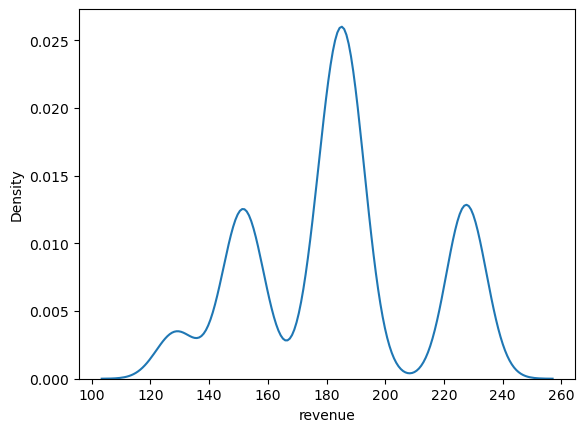

In [9]:
data_email_call = data[(data['sales_method'] == 'Email + Call') | (data['sales_method'] == 'em + call')]
data_email_call.agg({'revenue':['median','mean']})
sns.kdeplot(x = 'revenue', data = data_email_call)
plt.show()
# Right Skewed data so go towards median

In [10]:
median_email_call = data_email_call['revenue'].median()
data_email_call['revenue'] = data_email_call['revenue'].fillna(median_email_call)
print(data_email_call.head())

    week  sales_method                           customer_id  nb_sold  \
1      6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   
17     6  Email + Call  d10690f0-6f63-409f-a1da-8ab0e5388390       15   
21     1  Email + Call  544cf718-2b90-4e9f-ac4a-40ba0e7f2c88        9   
22     3     em + call  d72de17a-0d71-401b-b64a-dc4492b2b1ed       10   
27     3  Email + Call  2c211b5b-7e1b-4b19-949e-a35f67e9fe25       10   

    revenue  years_as_customer  nb_site_visits           state sales_type  
1    225.47                  1              28          Kansas       Call  
17   184.74                  0              24       Wisconsin       Call  
21   128.87                  6              24        Michigan       Call  
22   150.47                 20              21  North Carolina          0  
27   153.07                  8              24        Michigan       Call  


C:\Users\Admin\AppData\Local\Temp\ipykernel_10408\1757341834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_email_call['revenue'] = data_email_call['revenue'].fillna(median_email_call)


In [39]:
data_call = data[data['sales_method'] == 'Call']
print(data_call['revenue'].max())
print(data_call['revenue'].min())
print(data_call.dropna(subset = ['revenue'], inplace = True))
print(data_call.isna().sum())

71.36
32.54
None
week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
sales_type           0
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_10408\1901630952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  print(data_call.dropna(subset = ['revenue'], inplace = True))


In [12]:
new_data = pd.concat([data_call, data_email_call, data_email],
                    keys = ['Call', 'Email + Call', 'Email'])
new_data = new_data.reset_index(level=0).rename(columns = {'level_0':'METHOD'})

print(new_data.head())

   METHOD  week sales_method                           customer_id  nb_sold  \
2    Call     5         Call  d1de9884-8059-4065-b10f-86eef57e4a44       11   
5    Call     6         Call  6489e678-40f2-4fed-a48e-d0dff9c09205       13   
9    Call     5         Call  56491dae-bbe7-49f0-a651-b823a01103d8       11   
11   Call     2         Call  c20ab049-cbac-4ba7-8868-310aa89e0549        9   
12   Call     5         Call  0b026b91-fe12-4af0-86f9-387ba81c8fdb       11   

    revenue  years_as_customer  nb_site_visits        state sales_type  
2     52.55                  6              26    Wisconsin       Call  
5     65.01                 10              24  Mississippi       Call  
9     53.82                  7              23     Missouri       Call  
11    45.42                  2              23     New York       Call  
12    53.42                  2              30     Maryland       Call  


              customer_id
METHOD                   
Call                 4781
Email                7466
Email + Call         2572


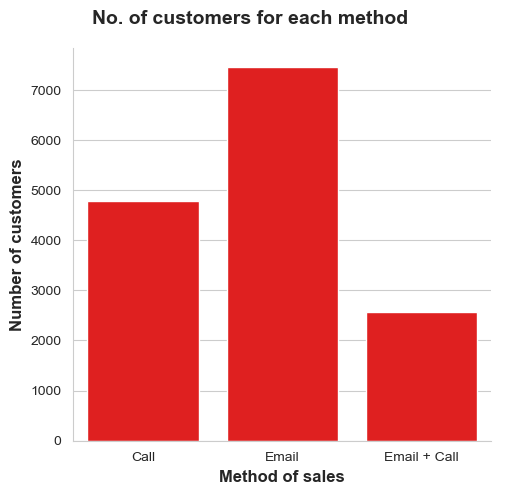

In [13]:
no_customers = pd.DataFrame(new_data.groupby('METHOD')['customer_id'].agg('count'))
print(no_customers)

sns.set_style('whitegrid')
custom_palette = ["red", "purple", "gray"]

# Set the palette
sns.set_palette(custom_palette)
g = sns.catplot(x = 'METHOD', y = 'customer_id', data = no_customers, kind = 'bar')
g.fig.suptitle('No. of customers for each method', fontsize  = 14,weight = 'bold')
#g.set(xlabel = 'Method of sales', ylabel = 'Number of customers')
plt.xlabel('Method of sales', fontsize=12, weight='bold')
plt.ylabel('Number of customers', fontsize=12, weight='bold')
plt.tick_params(axis='both', which='both', length=5, color='black')

plt.tight_layout()
plt.show()


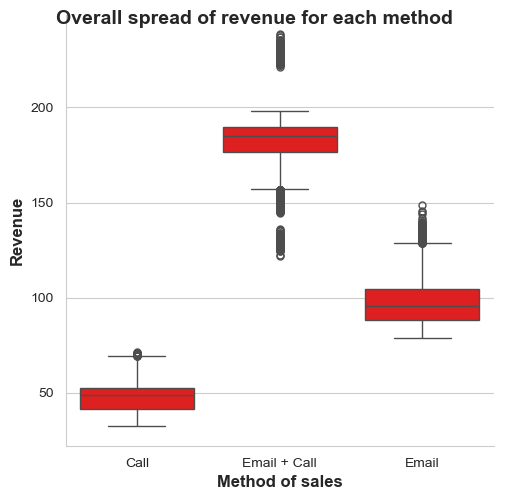

In [14]:
g = sns.catplot(x = 'METHOD', y = 'revenue', data = new_data, kind = 'box')
g.fig.suptitle('Overall spread of revenue for each method', fontsize  = 14,weight = 'bold')
plt.tick_params(axis='both', which='both', length=5, color='black', direction='out')
plt.xlabel('Method of sales', fontsize=12, weight='bold')
plt.ylabel('Revenue', fontsize=12, weight='bold')
plt.show()



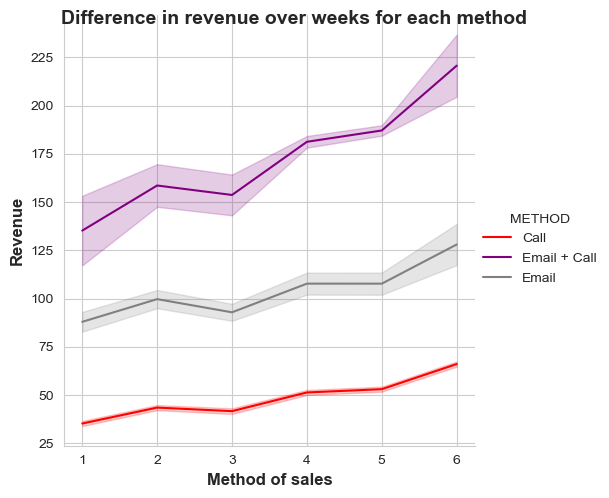

In [15]:
g = sns.relplot(x = 'week', y = 'revenue', data = new_data, kind = 'line', hue = 'METHOD', errorbar = 'sd')
g.fig.suptitle("Difference in revenue over weeks for each method", fontsize  = 14,weight = 'bold')
plt.xlabel('Method of sales', fontsize=12, weight='bold')
plt.ylabel('Revenue', fontsize=12, weight='bold')
plt.show()

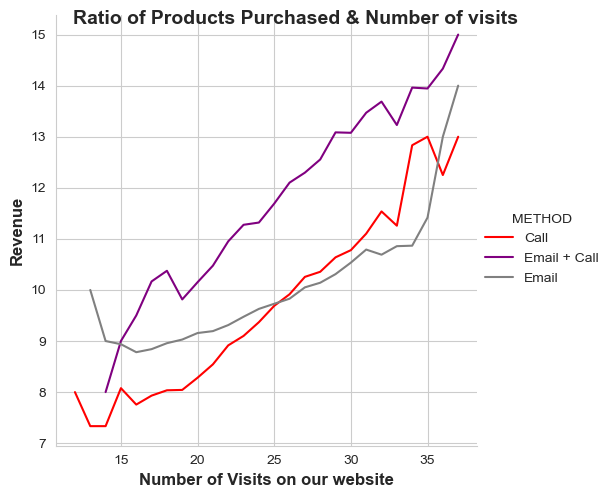

In [40]:
# Number of visits from past 6 months
g = sns.relplot(x = 'nb_site_visits', y = 'nb_sold', data  = new_data, kind = 'line', hue = 'METHOD', errorbar = None)
g.fig.suptitle("Ratio of Products Purchased & Number of visits", fontsize  = 14,weight = 'bold')
plt.xlabel('Number of Visits on our website', fontsize=12, weight='bold')
plt.ylabel('Revenue', fontsize=12, weight='bold')
plt.show()

In [17]:
new_data['Conversion Rate'] = new_data['nb_sold'] / new_data['nb_site_visits'] 
new_l5 = pd.DataFrame(new_data[new_data['METHOD'] == 'Call' ])
new_g5 = pd.DataFrame(new_data[new_data['METHOD'] == 'Email' ])
new_f5 = pd.DataFrame(new_data[new_data['METHOD'] == 'Email + Call' ])

print(new_l5['Conversion Rate'].mean())
print(new_l5.count())
print(new_g5['Conversion Rate'].mean())
print(new_g5.count())
print(new_f5['Conversion Rate'].mean())
print(new_f5.count())

0.39236992680934407
METHOD               4781
week                 4781
sales_method         4781
customer_id          4781
nb_sold              4781
revenue              4781
years_as_customer    4781
nb_site_visits       4781
state                4781
sales_type           4781
Conversion Rate      4781
dtype: int64
0.39788917268054946
METHOD               7466
week                 7466
sales_method         7466
customer_id          7466
nb_sold              7466
revenue              7466
years_as_customer    7466
nb_site_visits       7466
state                7466
sales_type           7466
Conversion Rate      7466
dtype: int64
0.4597102947655551
METHOD               2572
week                 2572
sales_method         2572
customer_id          2572
nb_sold              2572
revenue              2572
years_as_customer    2572
nb_site_visits       2572
state                2572
sales_type           2572
Conversion Rate      2572
dtype: int64


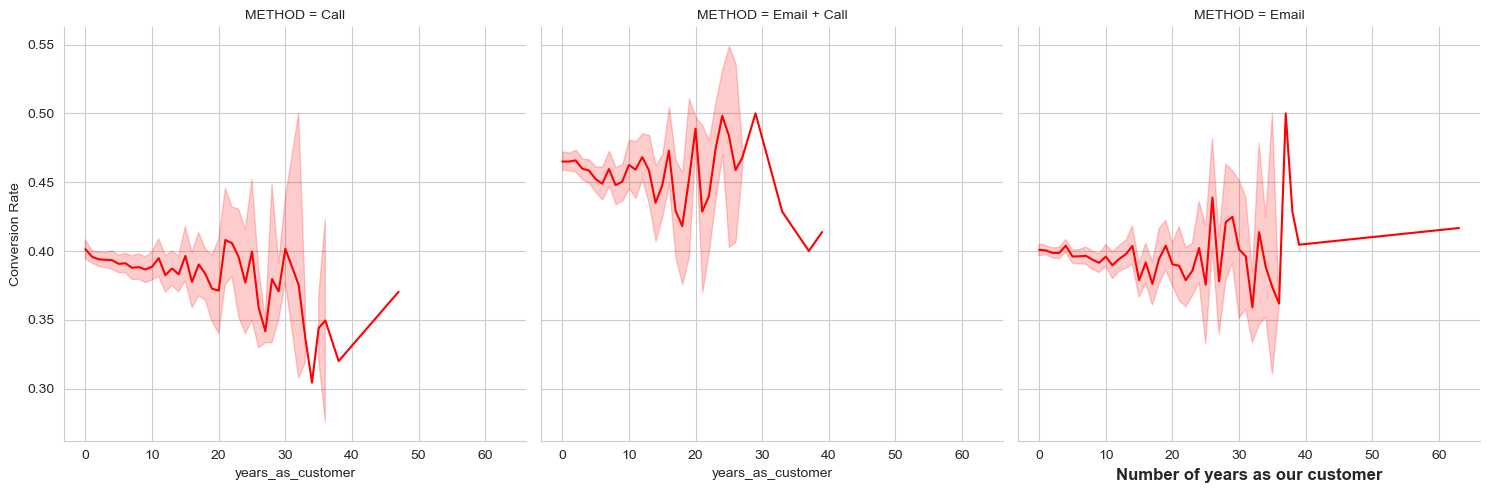

In [42]:
g = sns.relplot( x = 'years_as_customer', y = 'Conversion Rate', data = new_data, kind ='line', col = 'METHOD')
plt.xlabel('Number of years as our customer', fontsize=12, weight='bold')
plt.ylabel('Conversion Rate', fontsize=12, weight='bold')
plt.show()